In [68]:
#Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
%matplotlib inline
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import itertools

In [69]:
#Reading and transforming the file
#countries = pd.read_excel('GlobalLandTemperaturesByPopulcities.xlsx')
#India = countries.loc[countries['Country'] == 'India', ['dt','AverageTemperature','City']]
#India.columns = ['Date','Temp','City']
#India['Date'] = pd.to_datetime(India['Date'])
#India.reset_index(drop=True, inplace=True)
#India.set_index('Date', inplace=True)

#I'm going to consider the temperature just from 1900 until the end of 2012
#India = India.loc['1900-01-01':'2013-01-01']
#India = India.asfreq('M', method='bfill')
#India.head()

In [70]:
cities = pd.read_excel('GlobalLandTemperaturesByPopulcities.xlsx')
popul_cities = cities[cities['City'].isin(['Tokyo','Delhi','Shanghai','Bombay','Sao Paulo','Mexico','Cairo','New York'])]
popul_cities = popul_cities[['dt','AverageTemperature','City']]
popul_cities.columns = ['Date','Temp','City']
popul_cities['Date'] = pd.to_datetime(popul_cities['Date'])
popul_cities.reset_index(drop=True, inplace=True)
popul_cities.set_index('Date', inplace=True)

#I'm going to consider the temperature just from 1900 until the end of 2013
popul_cities.head()

,Temp,City
Date,,
1900-01-01,24.310,Bombay
1900-01-01,12.829,Cairo
1900-01-01,14.129,Delhi
1900-01-01,12.312,Mexico
1900-01-01,-2.214,New York


In [71]:
NY = cities[cities['City'].isin(['New York'])]
NY = NY[['dt','AverageTemperature','City']]
NY.columns = ['Date','Temp','City']
NY['Date'] = pd.to_datetime(NY['Date'])
NY.reset_index(drop=True, inplace=True)
NY.set_index('Date', inplace=True)

#I'm going to consider the temperature just from 1900 until the end of 2013
NY.head()

,Temp,City
Date,,
1900-01-01,-2.214,New York
1900-02-01,-2.477,New York
1900-03-01,-0.070,New York
1900-04-01,9.069,New York
1900-05-01,14.919,New York


In [72]:
#New York Population from 1900 to 2013
NY_pop= pd.read_excel('GlobalLandTemperaturesByPopulcities.xlsx',sheet_name = 'New York')
NY_pop = NY_pop[['dt','AverageTemperature','City','Population']]
NY_pop.columns = ['Date','Temp','City','Population']
NY_pop['Date'] = pd.to_datetime(NY_pop['Date'])
NY_pop.reset_index(drop=True, inplace=True)
NY_pop.set_index('Date', inplace=True)

In [73]:
NY_pop.head()

,Temp,City,Population
Date,,,
1900-01-01,-2.214,New York,3437202.0
1900-02-01,-2.477,New York,3437202.0
1900-03-01,-0.070,New York,3437202.0
1900-04-01,9.069,New York,3437202.0
1900-05-01,14.919,New York,3437202.0


In [74]:
tokyo = cities[cities['City'].isin(['Tokyo'])]
tokyo = tokyo[['dt','AverageTemperature','City']]
tokyo.columns = ['Date','Temp','City']
tokyo['Date'] = pd.to_datetime(tokyo['Date'])
tokyo.reset_index(drop=True, inplace=True)
tokyo.set_index('Date', inplace=True)

#I'm going to consider the temperature just from 1900 until the end of 2013
tokyo.head()

,Temp,City
Date,,
1900-01-01,-0.570,Tokyo
1900-02-01,0.932,Tokyo
1900-03-01,4.175,Tokyo
1900-04-01,10.210,Tokyo
1900-05-01,16.124,Tokyo


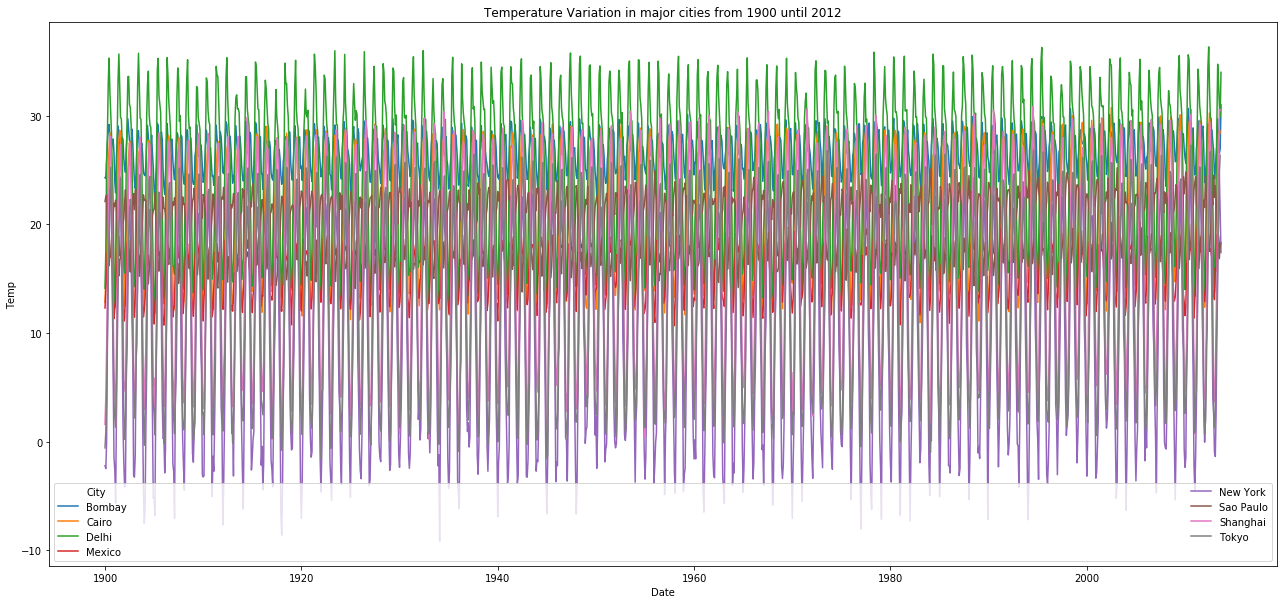

In [75]:
#Checking how temperature behaved from 1900 to 2013 in populated cities
plt.figure(figsize=(22,10))
sns.lineplot(x=popul_cities.index, y=popul_cities['Temp'],hue=popul_cities['City'])
plt.title('Temperature Variation in major cities from 1900 until 2012')
plt.legend(loc="lower left", mode='expand', ncol=len(popul_cities.columns))
plt.show()

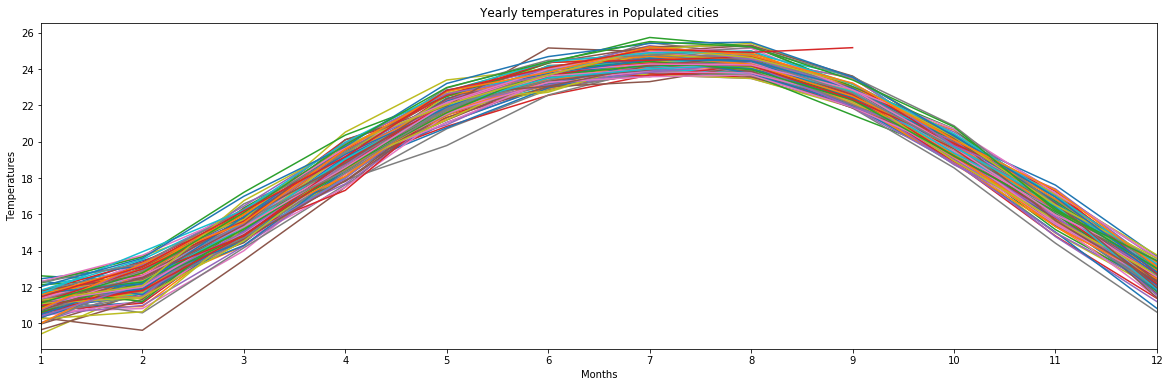

In [76]:
# Created a pivot table to plot the monthly temperatures through the years
popul_cities['month'] = popul_cities.index.month
popul_cities['year'] = popul_cities.index.year
pivot_populcities = pd.pivot_table(popul_cities, values='Temp', index='month', columns='year', aggfunc='mean')
pivot_populcities.plot(figsize=(20,6))
plt.title('Yearly temperatures in Populated cities')
plt.xlabel('Months')
plt.ylabel('Temperatures')
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.show()

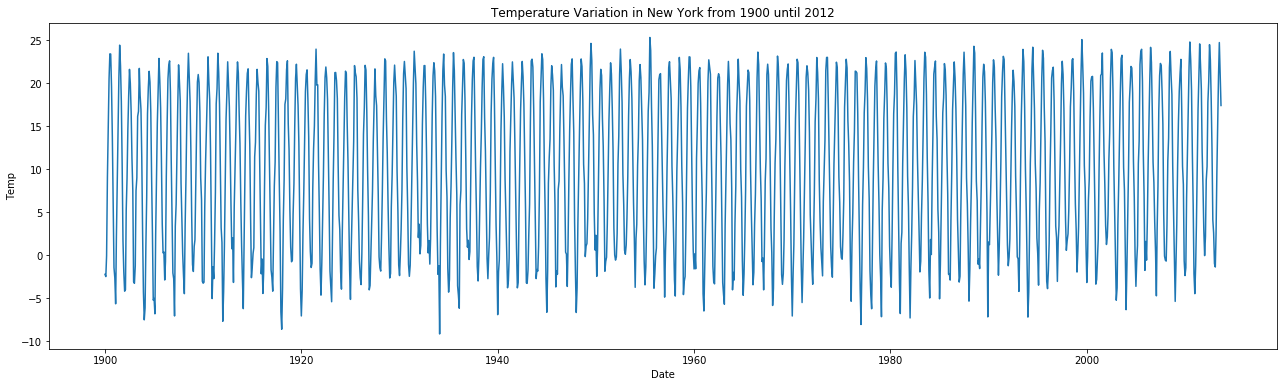

In [77]:
#Temperature trend in New York from 1900 to 2013
plt.figure(figsize=(22,6))
sns.lineplot(x=NY.index, y=NY['Temp'])
plt.title('Temperature Variation in New York from 1900 until 2012')
plt.show()

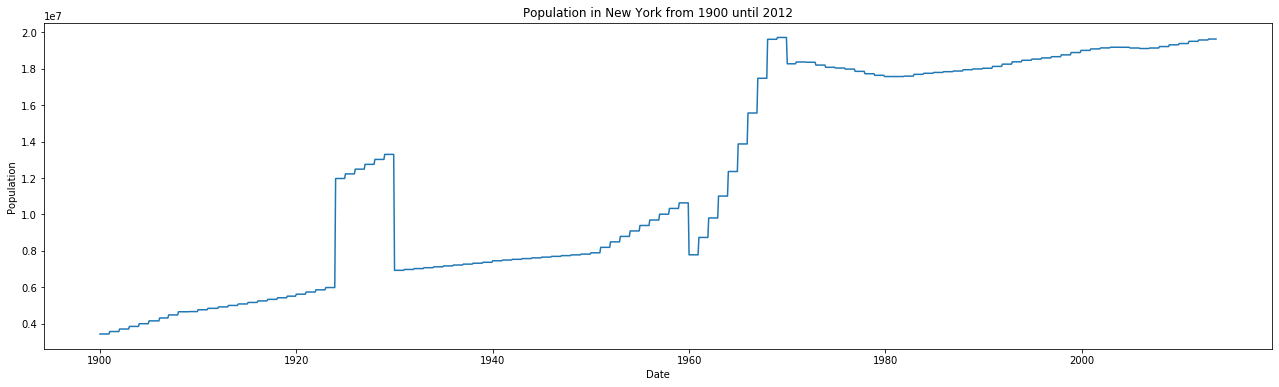

In [78]:
#Population trend in New York from 1900 to 2013
plt.figure(figsize=(22,6))
sns.lineplot(x=NY.index, y=NY_pop['Population'])
plt.title('Population in New York from 1900 until 2012')
plt.show()

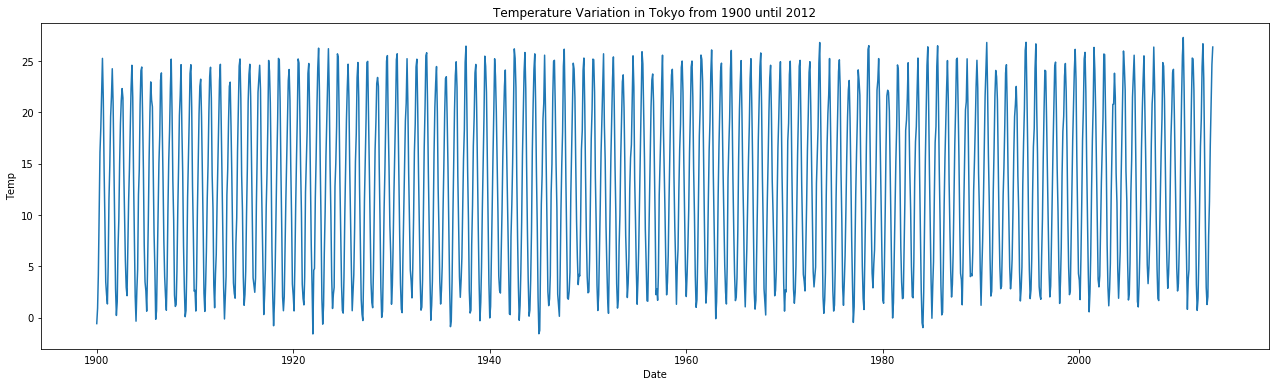

In [79]:
#Temperature trend in Tokyo from 1900 to 2013
plt.figure(figsize=(22,6))
sns.lineplot(x=tokyo.index, y=tokyo['Temp'])
plt.title('Temperature Variation in Tokyo from 1900 until 2012')
plt.show()

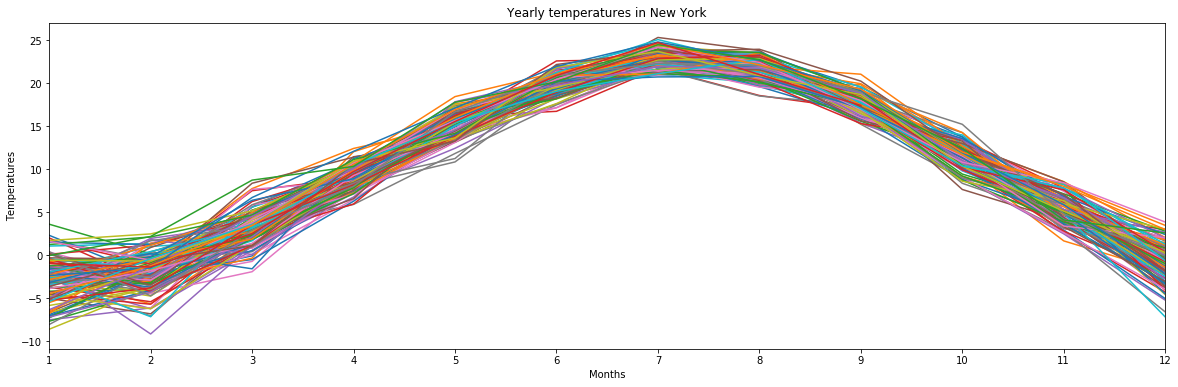

In [80]:
# Created a pivot table to plot the monthly temperatures in New York through the years
NY['month'] = NY.index.month
NY['year'] = NY.index.year
pivot_NY = pd.pivot_table(NY, values='Temp', index='month', columns='year', aggfunc='mean')
pivot_NY.plot(figsize=(20,6))
plt.title('Yearly temperatures in New York')
plt.xlabel('Months')
plt.ylabel('Temperatures')
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.show()

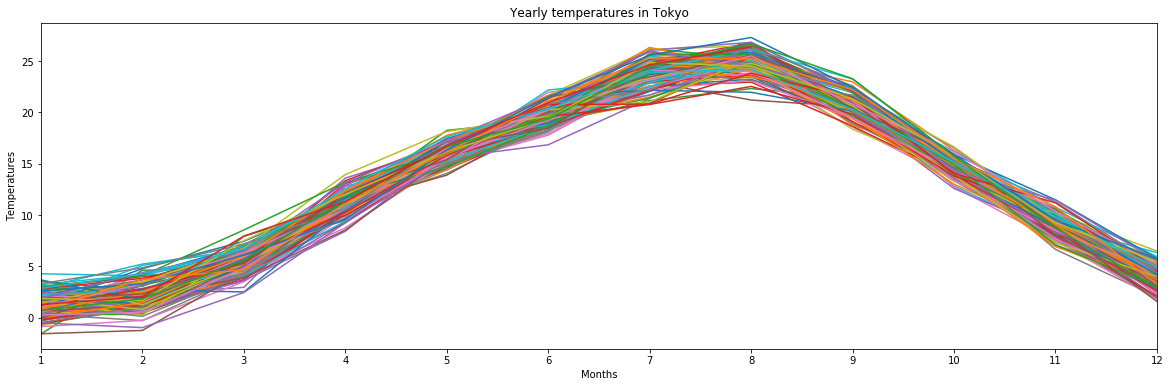

In [81]:
# Created a pivot table to plot the monthly temperatures in Tokyo through the years
tokyo['month'] = tokyo.index.month
tokyo['year'] = tokyo.index.year
pivot_tokyo = pd.pivot_table(tokyo, values='Temp', index='month', columns='year', aggfunc='mean')
pivot_tokyo.plot(figsize=(20,6))
plt.title('Yearly temperatures in Tokyo')
plt.xlabel('Months')
plt.ylabel('Temperatures')
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.show()

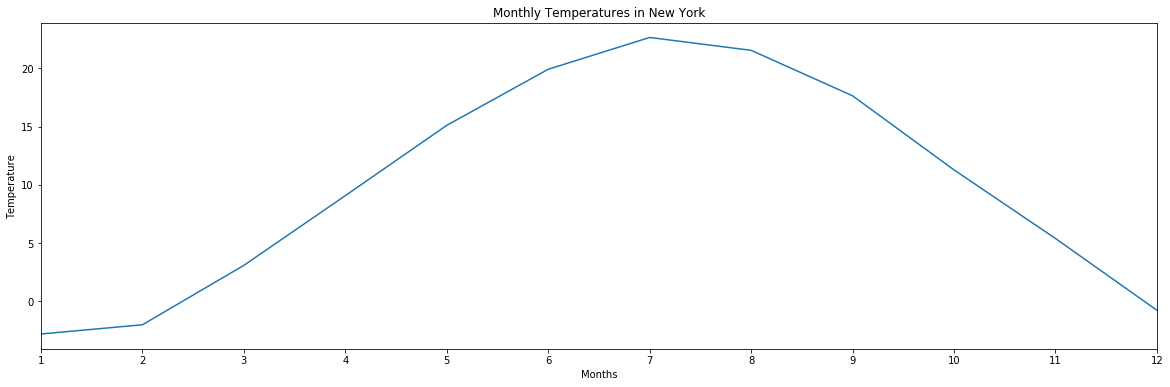

In [82]:
#Checking seasonality
monthly_seasonality = pivot_NY.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.title('Monthly Temperatures in New York')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1,13)])
plt.show()
#Series follow a parabolic curve - lower temperatures during January, February, March, November and December
#and higher temperatures between April and October

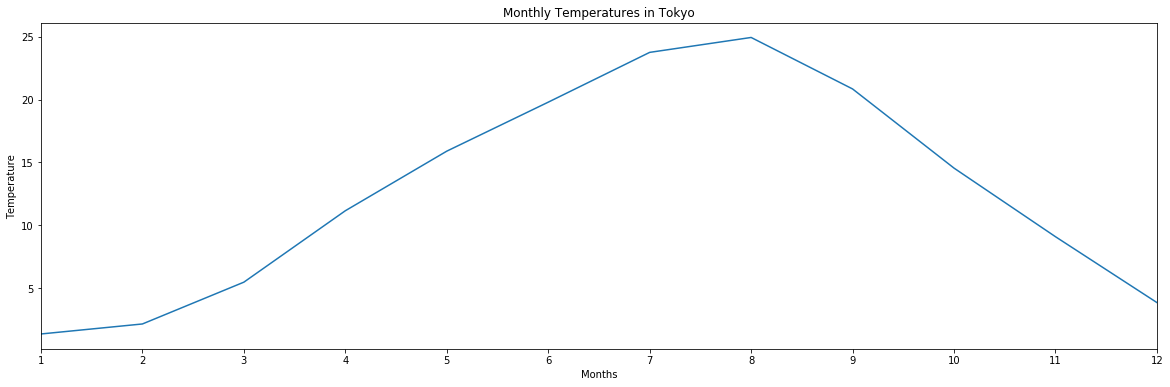

In [83]:
#Checking seasonality
monthly_seasonality = pivot_tokyo.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))
plt.title('Monthly Temperatures in Tokyo')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1,13)])
plt.show()
#Series follow a parabolic curve - lower temperatures during January, February, March, November and December
#and higher temperatures between April and October

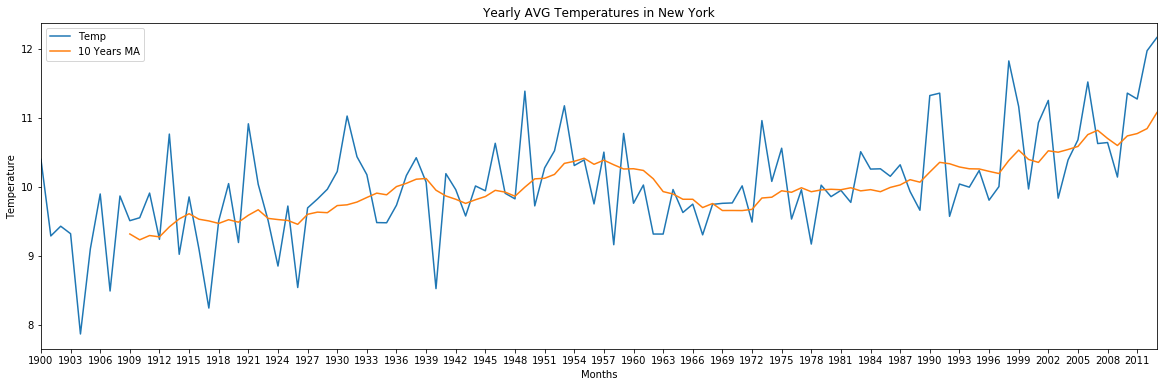

In [84]:
#Checking trend in New York using moving average
year_avg_NY = pd.pivot_table(NY, values='Temp', index='year', aggfunc='mean')
year_avg_NY['10 Years MA'] = year_avg_NY['Temp'].rolling(10).mean()
year_avg_NY[['Temp','10 Years MA']].plot(figsize=(20,6))
plt.title('Yearly AVG Temperatures in New York')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1900,2012,3)])
plt.show()
#We can confirm that there is a constant increasing trend with slight decrease during 1969 to 1986 and that the average
#temperature increased from 8º to 12º, that's 50% in over 100 years!

In [85]:
#Checking Population trend in New York using moving average
NY_pop['month'] = NY_pop.index.month
NY_pop['year'] = NY_pop.index.year

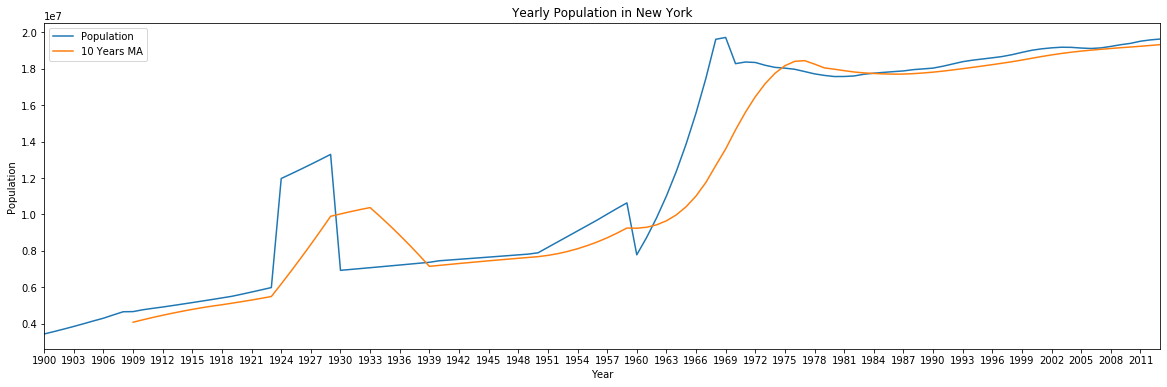

In [86]:
pop_avg_NY = pd.pivot_table(NY_pop, values='Population', index='year', aggfunc='mean')
pop_avg_NY['10 Years MA'] = pop_avg_NY['Population'].rolling(10).mean()
pop_avg_NY[['Population','10 Years MA']].plot(figsize=(20,6))
plt.title('Yearly Population in New York')
plt.xlabel('Year')
plt.ylabel('Population')
plt.xticks([x for x in range(1900,2012,3)])
plt.show()
#We can confirm that there is a constant increasing trend with slight decrease during 1969 to 1986 and that the average
#population increased from 0.4*10^7 to 2*10^7 in over 100 years!

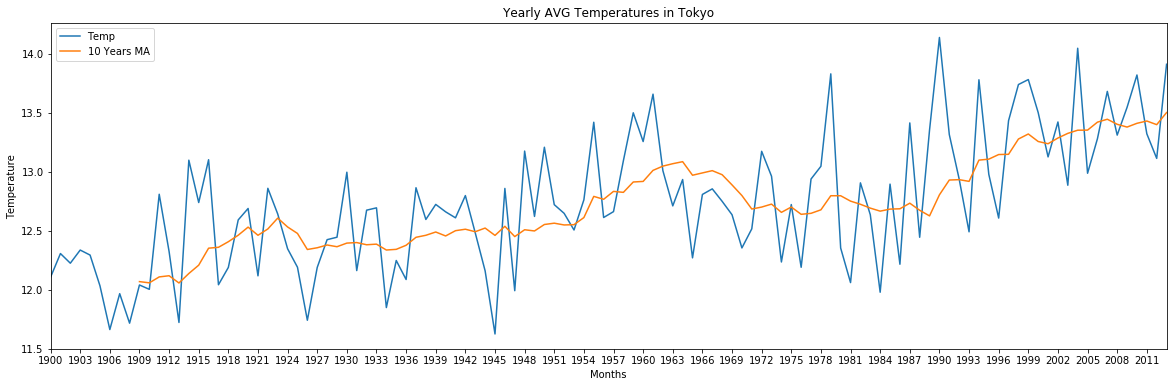

In [87]:
#Checking trend in Tokyo using moving average
year_avg_tokyo = pd.pivot_table(tokyo, values='Temp', index='year', aggfunc='mean')
year_avg_tokyo['10 Years MA'] = year_avg_tokyo['Temp'].rolling(10).mean()
year_avg_tokyo[['Temp','10 Years MA']].plot(figsize=(20,6))
plt.title('Yearly AVG Temperatures in Tokyo')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1900,2012,3)])
plt.show()
#We can confirm that there is a constant increasing trend with slight decrease during 1969 to 1986 and that the average
#temperature increased from 11.5º to 14º, that's 21.7% in over 100 years!

In [88]:
#Checking whether original series has white noise
sm.stats.acorr_ljungbox(NY['Temp'], lags=[12],boxpierce=True)
#the 2nd list in the returned array is p-values from the ljungbox test and the 4th list is the p-values from the boxpierce test. 
#Since p-value < .05,we reject the null hypothesis: Series is white noise.
#Both tests agree that original series(each of it's first 12 lags with > 95% confidence level) are not white noise .

(array([7597.22169562]), array([0.]), array([7547.29511899]), array([0.]))

In [89]:
#Checking whether Population series has white noise
sm.stats.acorr_ljungbox(NY_pop['Population'], lags=[12],boxpierce=True)
#the 2nd list in the returned array is p-values from the ljungbox test and the 4th list is the p-values from the boxpierce test. 
#Since p-value < .05,we reject the null hypothesis: Series is white noise.
#Both tests agree that original series(each of it's first 12 lags with > 95% confidence level) are not white noise .

(array([15928.01682375]), array([0.]), array([15829.61227337]), array([0.]))

In [90]:
#For cross validation , splitting the New York subset into Training, Validation and testing sets
train = NY[:-60].copy()
val = NY[-60:-12].copy()
test = NY[-12:].copy()

In [91]:
#For cross validation , splitting the Tokyo subset into Training, Validation and testing sets
train1 = tokyo[:-60].copy()
val1 = tokyo[-60:-12].copy()
test1 = tokyo[-12:].copy()

In [92]:
#For cross validation , splitting the New York along with exogenous variable Population subset into Training, Validation 
#and testing sets
trainpop = NY_pop[:-60].copy()
valpop = NY_pop[-60:-12].copy()
testpop = NY_pop[-12:].copy()

In [93]:
# Excluding the first line in New York subset, as it has NaN values
train['Temp'].dropna(inplace=True)
baseline_NY = val['Temp'].shift()
baseline_NY.dropna(inplace=True)
baseline_NY.head()

Date
2008-11-01    10.348
2008-12-01     5.133
2009-01-01     0.327
2009-02-01    -5.360
2009-03-01    -0.372
Name: Temp, dtype: float64

In [94]:
# Excluding the first line in Tokyo subset, as it has NaN values
train1['Temp'].dropna(inplace=True)
baseline_tokyo = val1['Temp'].shift()
baseline_tokyo.dropna(inplace=True)
baseline_tokyo.head()

Date
2008-11-01    15.746
2008-12-01     9.247
2009-01-01     5.430
2009-02-01     2.864
2009-03-01     4.269
Name: Temp, dtype: float64

In [95]:
# Excluding the first line in New York +population subset, as it has NaN values
trainpop['Temp'].dropna(inplace=True)
baseline_NYpop = valpop['Temp'].shift()
baseline_NYpop.dropna(inplace=True)
baseline_NYpop.head()

Date
2008-11-01    10.348
2008-12-01     5.133
2009-01-01     0.327
2009-02-01    -5.360
2009-03-01    -0.372
Name: Temp, dtype: float64

In [96]:
def measure_rmse(y_true, y_pred):
    return sqrt(mean_squared_error(y_true,y_pred))

# Using the function with the baseline values
rmse_base = measure_rmse(valpop.iloc[1:,0],baseline_NYpop)
print(f'The RMSE of the baseline that we will try to diminish is {round(rmse_base,4)} celsius degrees')

The RMSE of the baseline that we will try to diminish is 4.9071 celsius degrees


In [97]:
def check_stationarity(y, lags_plots=48, figsize=(22,8)):
    "Use Series as parameter"
    
    # Creating plots of the DF
    y = pd.Series(y)
    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)

    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Temperature Variation')
    plot_acf(y, lags=lags_plots, zero=False, ax=ax2);
    plot_pacf(y, lags=lags_plots, zero=False, ax=ax3,alpha=0.05);
    sns.distplot(y, bins=int(sqrt(len(y))), ax=ax4)
    ax4.set_title('Distribution Chart')

    plt.tight_layout()
    
    print('Results of Dickey-Fuller Test:')
    adfinput = adfuller(y)
    adftest = pd.Series(adfinput[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    adftest = round(adftest,4)
    
    for key, value in adfinput[4].items():
        adftest["Critical Value (%s)"%key] = value.round(4)
        
    print(adftest)
    
    if adftest[0].round(2) < adftest[5].round(2):
        print('\nThe Test Statistics is lower than the Critical Value of 5%.\nThe series seems to be stationary')
    else:
        print("\nThe Test Statistics is higher than the Critical Value of 5%.\nThe series isn't stationary")

Results of Dickey-Fuller Test:
Test Statistic                   -5.0444
p-value                           0.0000
Lags Used                        23.0000
Number of Observations Used    1281.0000
Critical Value (1%)              -3.4355
Critical Value (5%)              -2.8638
Critical Value (10%)             -2.5680
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The series seems to be stationary


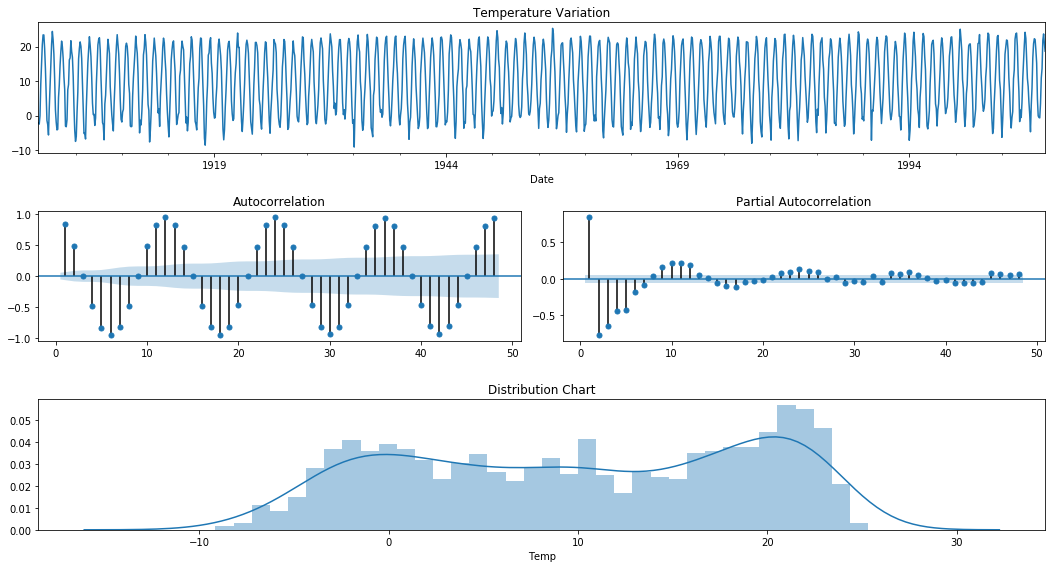

In [98]:
#Applying function on New York subset
check_stationarity(train['Temp'])

In [99]:
#The series has an interesting behavior, there is a sequential significative negative autocorrelation starting at lag 6 
#and repeating each 12 months, it's because of the difference in the seasons, if today is winter with cold temperatures 
#in 6 months we will have higher temperatures in the summer, that's why the negative autocorrelation occurs. 
#These temperatures usually walk in opposite directions.
#Also, from lag 12 and sequentially from every 12 lags there is a significant positive autocorrelation.
#The PACF shows a positive spike in the first lag and a drop to negative PACF for following lags.
#This behavior between the ACF and PACF plots suggests an AR(1) model and also a first seasonal difference (Y(t)-Y(t-12)).

Results of Dickey-Fuller Test:
Test Statistic                   -3.7773
p-value                           0.0031
Lags Used                        23.0000
Number of Observations Used    1281.0000
Critical Value (1%)              -3.4355
Critical Value (5%)              -2.8638
Critical Value (10%)             -2.5680
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The series seems to be stationary


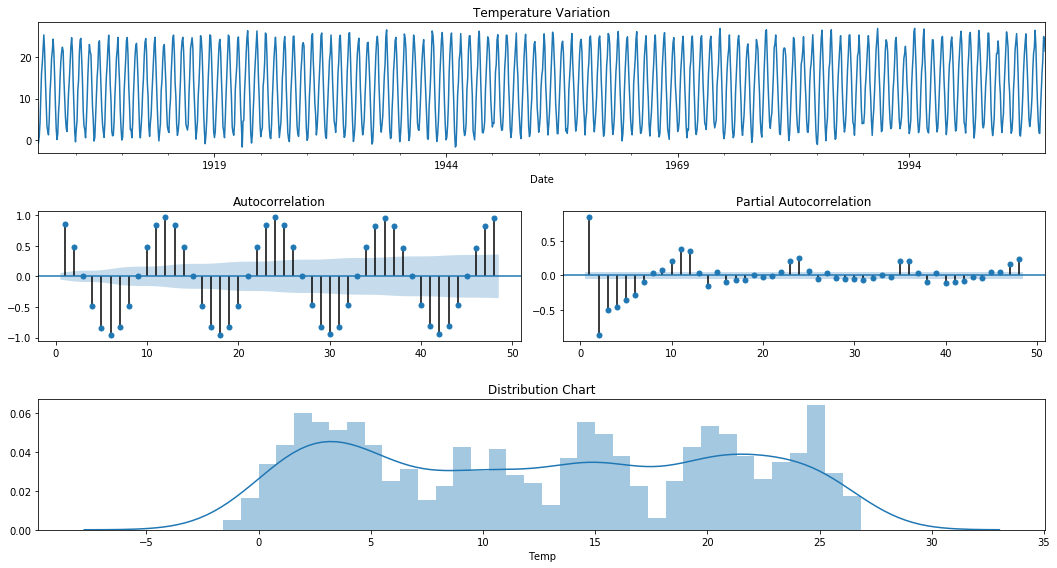

In [100]:
#Applying function on Tokyo subset
check_stationarity(train1['Temp'])

In [101]:
#The series has an interesting behavior, there is a sequential significative negative autocorrelation starting at lag 6 
#and repeating each 12 months, it's because of the difference in the seasons, if today is winter with cold temperatures 
#in 6 months we will have higher temperatures in the summer, that's why the negative autocorrelation occurs. 
#These temperatures usually walk in opposite directions.
#Also, from lag 12 and sequentially from every 12 lags there is a significant positive autocorrelation.
#The PACF shows a positive spike in the first lag and a drop to negative PACF for following lags.
#This behavior between the ACF and PACF plots suggests an AR(1) model and also a first seasonal difference (Y(t)-Y(t-12)).

Results of Dickey-Fuller Test:
Test Statistic                   -1.0438
p-value                           0.7369
Lags Used                         0.0000
Number of Observations Used    1364.0000
Critical Value (1%)              -3.4352
Critical Value (5%)              -2.8637
Critical Value (10%)             -2.5679
dtype: float64

The Test Statistics is higher than the Critical Value of 5%.
The series isn't stationary


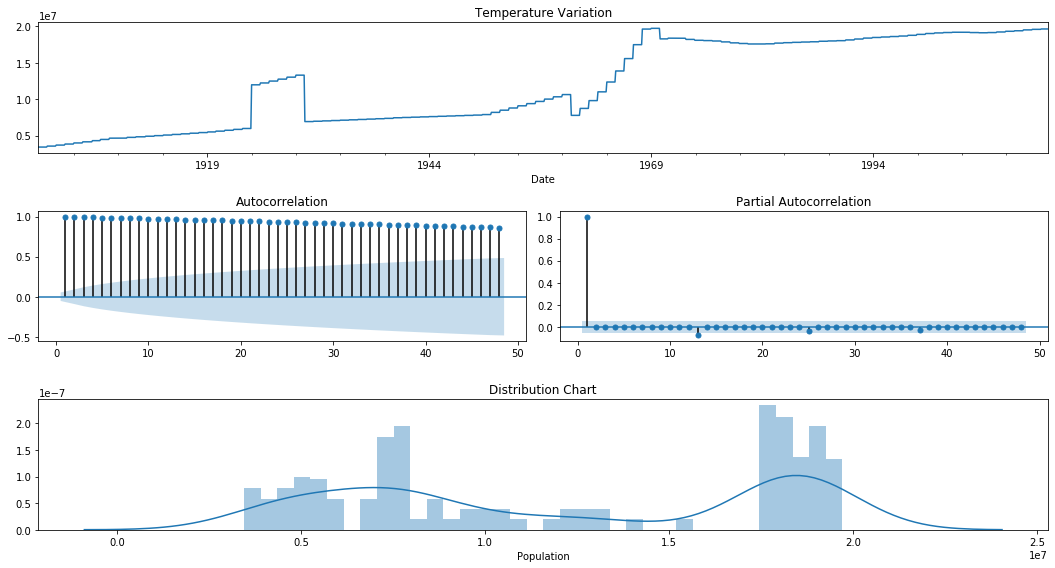

In [102]:
#Applying function to check stationarity of population series
check_stationarity(NY_pop['Population'])

In [103]:
#The series has no seasonality but the presence of trend makes the original series non stationary. As the P-value of the test
#suggests this series is not stationary.
#ACF has a very slow decay factor which implies AR model.
#The PACF shows a positive spike in the first lag and a drop to zero for following lags.
#This behavior between the ACF and PACF plots suggests an AR(1) model.

Results of Dickey-Fuller Test:
Test Statistic                  -13.3054
p-value                           0.0000
Lags Used                        23.0000
Number of Observations Used    1269.0000
Critical Value (1%)              -3.4355
Critical Value (5%)              -2.8638
Critical Value (10%)             -2.5680
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The series seems to be stationary


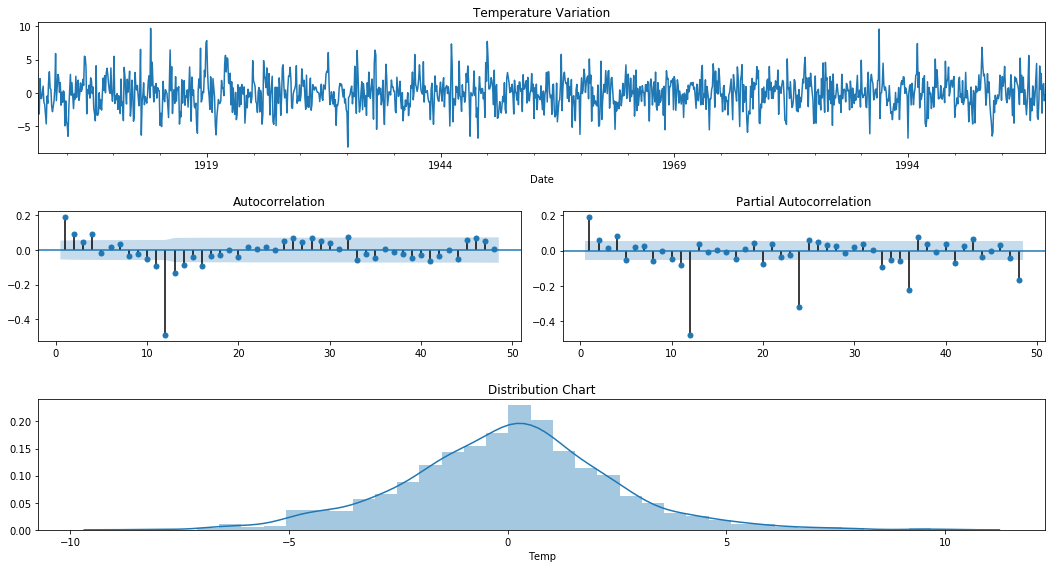

In [104]:
#After differencing on New York subset
check_stationarity(train['Temp'].diff(12).dropna())

In [105]:
#As the plots above showed, the first ACF lags have a gradual decay with one spurious significant spike at lag 12, 
#while the PACF drops under the confidence interval after the second lag, this is an AR signature with a parameter of 2,
#so this is an AR(2) model.
#Initially we are going to work with the following (p,d,q) orders: (2, 0, 0), and with the following seasonal (P, D, Q, S) 
#orders (0,1,0,12) and as the series has a clear uptrend we are going to use it in the model.

Results of Dickey-Fuller Test:
Test Statistic                  -13.5327
p-value                           0.0000
Lags Used                        23.0000
Number of Observations Used    1269.0000
Critical Value (1%)              -3.4355
Critical Value (5%)              -2.8638
Critical Value (10%)             -2.5680
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The series seems to be stationary


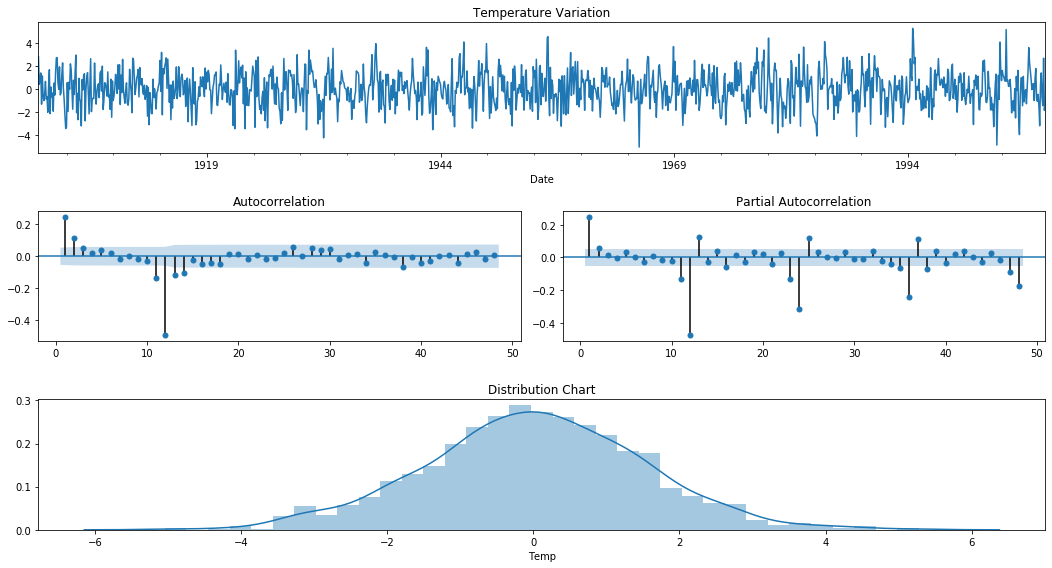

In [106]:
#After differencing on Tokyo subset
check_stationarity(train1['Temp'].diff(12).dropna())

In [107]:
#As the plots above showed, the first ACF lags have a gradual decay with one spurious significant spike at lag 12, 
#while the PACF drops under the confidence interval after the second lag, this is an AR signature with a parameter of 2,
#so this is an AR(2) model.
#Initially we are going to work with the following (p,d,q) orders: (2, 0, 0), and with the following seasonal (P, D, Q, S) 
#orders (0,1,0,12) and as the series has a clear uptrend we are going to use it in the model.

Results of Dickey-Fuller Test:
Test Statistic                   -5.9834
p-value                           0.0000
Lags Used                        24.0000
Number of Observations Used    1336.0000
Critical Value (1%)              -3.4353
Critical Value (5%)              -2.8637
Critical Value (10%)             -2.5679
dtype: float64

The Test Statistics is lower than the Critical Value of 5%.
The series seems to be stationary


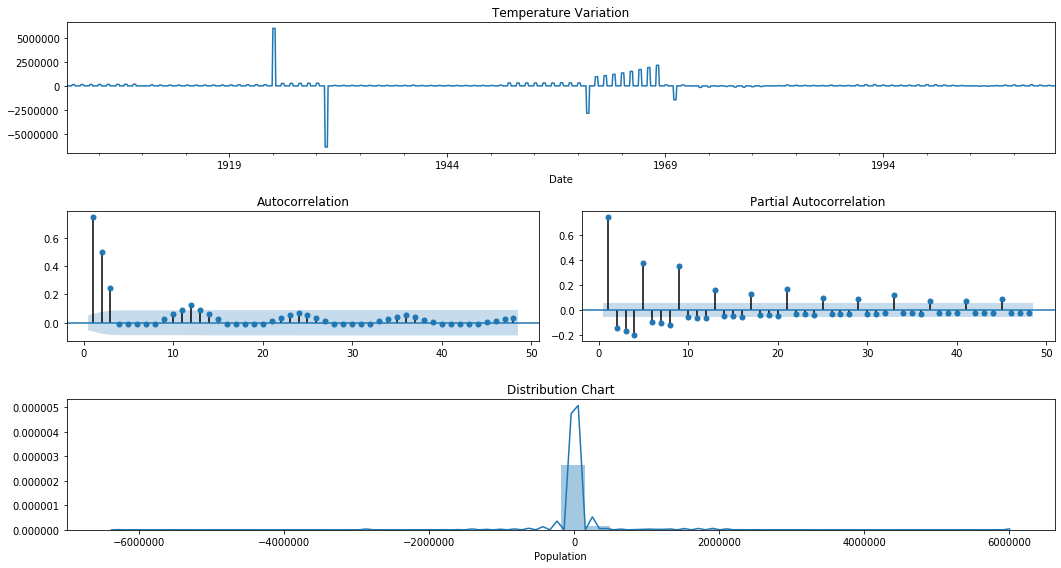

In [108]:
#After differencing on Population series for New York
check_stationarity(NY_pop['Population'].diff(4).dropna())

In [109]:
#As the plots above showed, ACF has significant lags till lag 3 followed by a kind of pattern from lag 11.
#But those are not that significant so we can ignore that pattern as of now. 
#PACF becomes negatively correlated and exponentially decays and becomes insignificant after lag 11
#so this shows a pattern of MA(1) model or we can try till MA(11) just to check if there any significance of lag =11 or
#that's a spurious one.

In [110]:
#Function to use one-step-forecast in the whole validation set and measure the error:
def walk_forward(training_set, validation_set, params):
    '''
    SARIMA parameters: ((pdq), (PDQS), trend)
    '''
    history = [x for x in training_set.values]
    prediction = list()
    
    # Using the SARIMA parameters and fitting the data
    pdq, PDQS, trend = params

    #Forecasting one period ahead in the validation set
    for week in range(len(validation_set)):
        model = sm.tsa.statespace.SARIMAX(history, order=pdq, seasonal_order=PDQS, trend=trend)
        result = model.fit(disp=False)
        yhat = result.predict(start=len(history), end=len(history))
        prediction.append(yhat[0])
        history.append(validation_set[week])
        
    return prediction

In [44]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [111]:
import pmdarima as pm

In [112]:
## SARIMAX Model using population as exogenous
sxmodel = pm.auto_arima(trainpop[['Temp']], exogenous=trainpop[['Population']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (1, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=5295.842, BIC=5326.830, Time=7.106 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=True); AIC=5877.685, BIC=5893.179, Time=0.636 seconds
Fit ARIMA: (1, 0, 0)x(1, 1, 0, 12) (constant=True); AIC=5523.073, BIC=5548.897, Time=6.545 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 1, 12) (constant=True); AIC=5305.452, BIC=5331.275, Time=6.071 seconds
Fit ARIMA: (0, 0, 0)x(0, 1, 0, 12) (constant=False); AIC=13847.686, BIC=13858.016, Time=0.505 seconds
Fit ARIMA: (1, 0, 1)x(0, 1, 0, 12) (constant=True); AIC=5826.885, BIC=5852.708, Time=2.259 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 1, 12) (constant=True); AIC=5321.435, BIC=5357.588, Time=8.537 seconds
Fit ARIMA: (1, 0, 1)x(0, 1, 2, 12) (constant=True); AIC=5250.547, BIC=5286.700, Time=19.565 seconds
Fit ARIMA: (1, 0, 1)x(1, 1, 2, 12) (constant=True); AIC=5258.040, BIC=5299.358, Time=22.535 seconds
Fit ARIMA: (0, 0, 1)x(0, 1, 2, 12) (constant=True); AIC=5261.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                 1305
Model:             SARIMAX(1, 0, 1)x(0, 1, [1, 2], 12)   Log Likelihood               -2618.274
Date:                                 Sun, 26 Apr 2020   AIC                           5250.547
Time:                                         18:42:20   BIC                           5286.700
Sample:                                     01-01-1900   HQIC                          5264.116
                                          - 09-01-2008                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0069      0.010      0.694      0.488      -0.013       0.026
Population -4.804e-08   6.99e-08     -0.687      0.492   -1.85e-07    8.89e-08
ar.L1          0.4921      0.200      2.455      0.014       0.099       0.885
ma.L1         -0.3113      0.219     -1.422      0.155      -0.740       0.118
ma.S.L12      -0.8229      0.047    -17.424      0.000      -0.915      -0.730
ma.S.L24      -0.0527      0.045     -1.160      0.246      -0.142       0.036
sigma2         5.2701      0.298     17.694      0.000       4.686       5.854
===================================================================================
Ljung-Box (Q):                       64.14   Jarque-Bera (JB):                52.82
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.92   Skew:                            -0.07
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
#As we can see the coefficient of Population is very small , so it's contribution is not significant

In [65]:
len(np.tile(valpop['Population'],1))

48

In [113]:
# Forecast
n_periods = 48
fitted, confint = sxmodel.predict(n_periods=n_periods, 
                                  exogenous=np.tile(valpop['Population'], 1).reshape(-1,1), 
                                  return_conf_int=True)


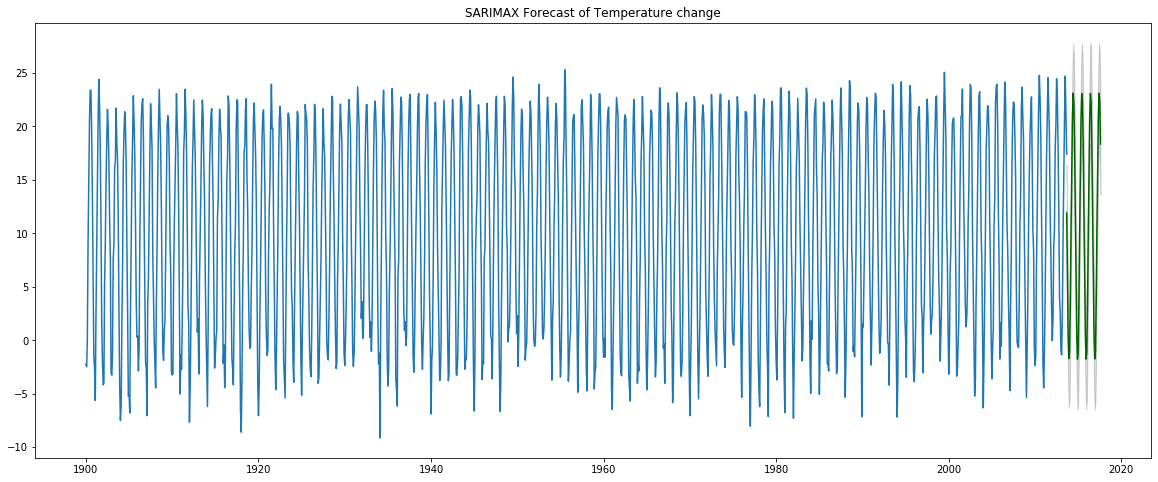

In [114]:
index_of_fc = pd.date_range(NY_pop.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(20,8))
plt.plot(NY_pop['Temp'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX Forecast of Temperature change")
plt.show()

In [49]:
#Steps to build multiple models and compare AICs to choose the best 
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter for SARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter for SARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [51]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train['Temp'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:10499.676088614366
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:9040.21970824751
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:5870.243867099376
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4997.726912291802
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:5865.952590193632
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:5047.851267438942
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:5457.306084558963
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4999.5979962580805
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:9129.399358289784
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:8096.682863070606
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:5824.66511270374
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4954.4319000573
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:5874.15738364245
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:5061.429565662398
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:5425.749703233039
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4956.369230311522
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:7962.396618844026
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:7188.643052512963
ARIMA(0, 1, 0

In [52]:
#ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:4933.10428 is the best
#mod = sm.tsa.statespace.SARIMAX(train['Temp'],
#                                order=(1, 1, 1),
#                                seasonal_order=(0, 1, 1, 12),
#                                enforce_stationarity=False,
#                                enforce_invertibility=False)

#results = mod.fit()
#print('AIC:{}'.format(results.aic))
#print(results.summary().tables[1])

In [53]:
#results.plot_diagnostics(figsize=(15, 12))
#plt.show()

In [131]:
#ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:4933.10428 is the best
# Testing the walk-forward function on the validation set
val['Pred'] = walk_forward(train['Temp'], val['Temp'], ((1,1,1),(0,1,1,12),'c'))

In [132]:
# Measuring the error of the prediction
rmse_pred = measure_rmse(val['Temp'], val['Pred'])

print(f"The RMSE of the SARIMA(1,1,1),(0,1,1,12),'c' model is {round(rmse_pred,4)} celsius degrees")
print(f"It's a decrease of {round((rmse_pred/rmse_base-1)*100,2)}% in the RMSE")

The RMSE of the SARIMA(1,1,1),(0,1,1,12),'c' model is 1.5125 celsius degrees
It's a decrease of -69.18% in the RMSE


In [115]:
valpop['Pred']= fitted
valpop.head()

,Temp,City,Population,month,year,Pred
Date,,,,,,
2008-10-01,10.348,New York,19212436.0,10,2008,11.915379
2008-11-01,5.133,New York,19212436.0,11,2008,6.215057
2008-12-01,0.327,New York,19307066.0,12,2008,0.400860
2009-01-01,-5.360,New York,19307066.0,1,2009,-1.713252
2009-02-01,-0.372,New York,19307066.0,2,2009,-1.053716


In [116]:
# Measuring the error of the prediction with Population as exogenous variable
rmse_pred_pop = measure_rmse(valpop['Temp'], valpop['Pred'])

print(f"The RMSE of the SARIMAX with exogenous model is {round(rmse_pred_pop,4)} celsius degrees")
print(f"It's a decrease of {round((rmse_pred_pop/rmse_base-1)*100,2)}% in the RMSE")

The RMSE of the SARIMAX with exogenous model is 1.6883 celsius degrees
It's a decrease of -65.6% in the RMSE


In [133]:
# Creating the error column
val['Error'] = val['Temp'] - val['Pred']

In [121]:
# Creating the error column with population model
valpop['Error'] = valpop['Temp'] - valpop['Pred']

In [57]:
#Analyzing the residuals by plotting the following charts:
#1.Current and Predicted values through the time.
#2.Residuals vs Predicted values in an scatterplot.
#3.QQ Plot showing the distribution of errors and its ideal distribution
#4.Autocorrelation plot of the Residuals to see if there is some correlation left.

In [118]:
def plot_error(data, figsize=(20,8)):
    '''
    There must have 3 columns following in this order: Temperature, Prediction, Error
    '''
    plt.figure(figsize=figsize)
    ax1 = plt.subplot2grid((2,2), (0,0))
    ax2 = plt.subplot2grid((2,2), (0,1))
    ax3 = plt.subplot2grid((2,2), (1,0))
    ax4 = plt.subplot2grid((2,2), (1,1))
    
    #Plotting the Current and Predicted values
    ax1.plot(data.iloc[:,0:2])
    ax1.legend(['Real','Pred'])
    ax1.set_title('Current and Predicted Values')
    
    # Residual vs Predicted values
    ax2.scatter(data.iloc[:,1], data.iloc[:,2])
    ax2.set_xlabel('Predicted Values')
    ax2.set_ylabel('Errors')
    ax2.set_title('Errors versus Predicted Values')
    
    ## QQ Plot of the residual
    sm.graphics.qqplot(data.iloc[:,2], line='r', ax=ax3)
    
    # Autocorrelation plot of the residual
    plot_acf(data.iloc[:,2], lags=(len(data.iloc[:,2])-1),zero=False, ax=ax4)
    plt.tight_layout()
    plt.show()

In [134]:
# We need to remove some columns to plot the charts
val.drop(['month','year'], axis=1, inplace=True)
val.head()
val.drop(['City'], axis=1, inplace=True)

In [135]:
val.head()

,Temp,Pred,Error
Date,,,
2008-10-01,10.348,12.111451,-1.763451
2008-11-01,5.133,5.820859,-0.687859
2008-12-01,0.327,-0.243559,0.570559
2009-01-01,-5.360,-1.985522,-3.374478
2009-02-01,-0.372,-1.940232,1.568232


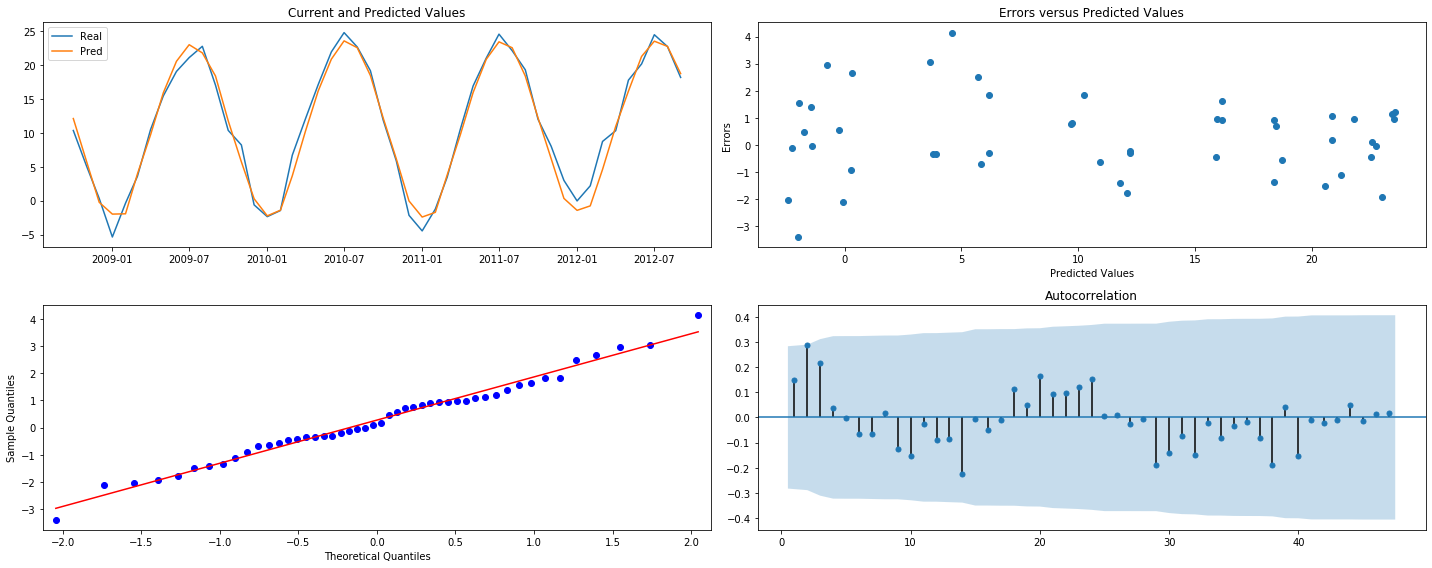

In [136]:
plot_error(val)

In [62]:
#Analyzing the plots above we can see that the predictions fit very well on the current values.
#The Error vs Predicted values has a linear distribution.
#The QQ Plot shows a normal pattern with some little outliers and,
#The autocorrelation plot shows no significant lags (outside 95% Confidence Interval).

In [123]:
# We need to remove some columns to plot the charts for model with exogenous variable
valpop.drop(['month','year'], axis=1, inplace=True)
valpop.head()
valpop.drop(['Population'], axis=1, inplace=True)
valpop.drop(['City'], axis=1, inplace=True)

,Temp,Pred,Error
Date,,,
2008-10-01,10.348,11.915379,-1.567379
2008-11-01,5.133,6.215057,-1.082057
2008-12-01,0.327,0.400860,-0.073860
2009-01-01,-5.360,-1.713252,-3.646748
2009-02-01,-0.372,-1.053716,0.681716


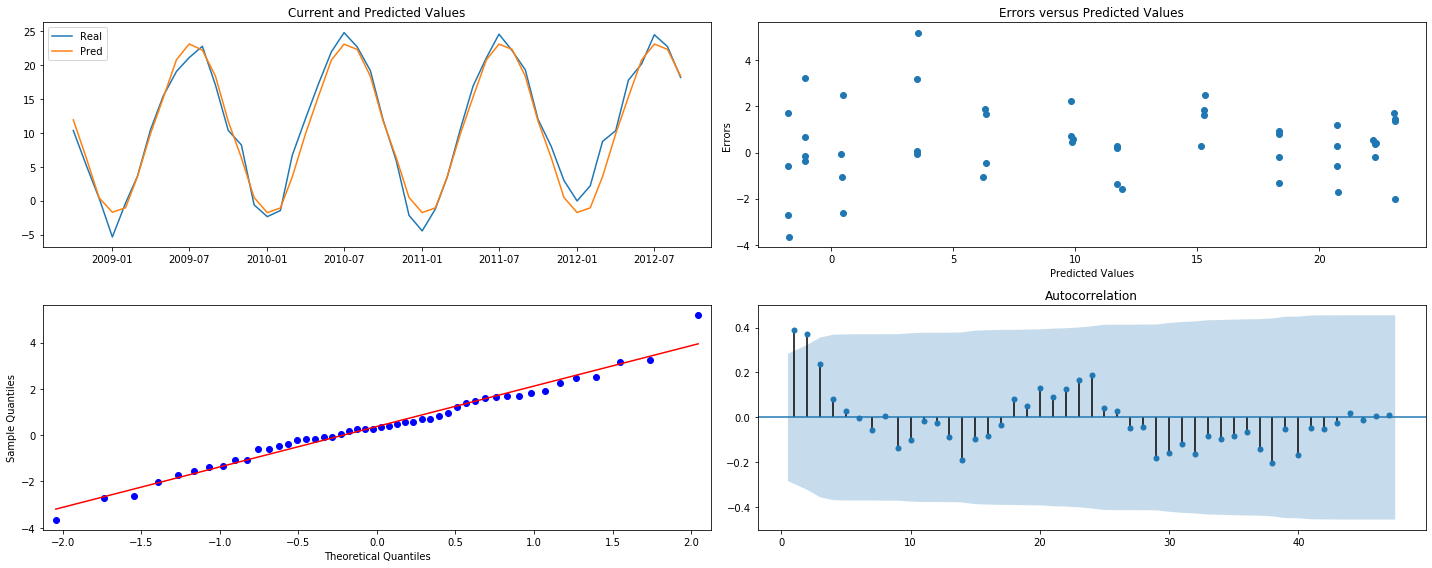

In [124]:
plot_error(valpop)

In [51]:
#Analyzing the plots above we can see that the predictions fit very well on the current values.
#The Error vs Predicted values has a linear distribution.
#The QQ Plot shows a normal pattern with some little outliers and,
#But the autocorrelation plot shows lag=1 and lag=2 as significant (outside 95% Confidence Interval).
#Hence, the model after adding population paramater is less superior than the model without exogenous variable.

In [137]:
#Finally it's time to extrapolate the prediction in the test set for the last 12 months
#Creating the new concatenating the training and validation set:
future = pd.concat([train['Temp'], val['Temp']])
future.head()

Date
1900-01-01    -2.214
1900-02-01    -2.477
1900-03-01    -0.070
1900-04-01     9.069
1900-05-01    14.919
Name: Temp, dtype: float64

In [138]:
# Using the same parameters of the fitted model
model = sm.tsa.statespace.SARIMAX(future, order=(1,0,1), seasonal_order=(0,1,1,12), trend='c')
result = model.fit(disp=False)

In [139]:
#create a new column on the test set with the predicted values and compare them against the real values
test['Pred'] = result.predict(start=(len(future)), end=(len(future)+13))
test.head()

,Temp,City,month,year,Pred
Date,,,,,
2012-10-01,12.436,New York,10,2012,11.778607
2012-11-01,4.103,New York,11,2012,6.253053
2012-12-01,2.586,New York,12,2012,0.091419
2013-01-01,-0.968,New York,1,2013,-2.272120
2013-02-01,-1.365,New York,2,2013,-1.087754


In [140]:
print(result.aic)

5160.022146564266


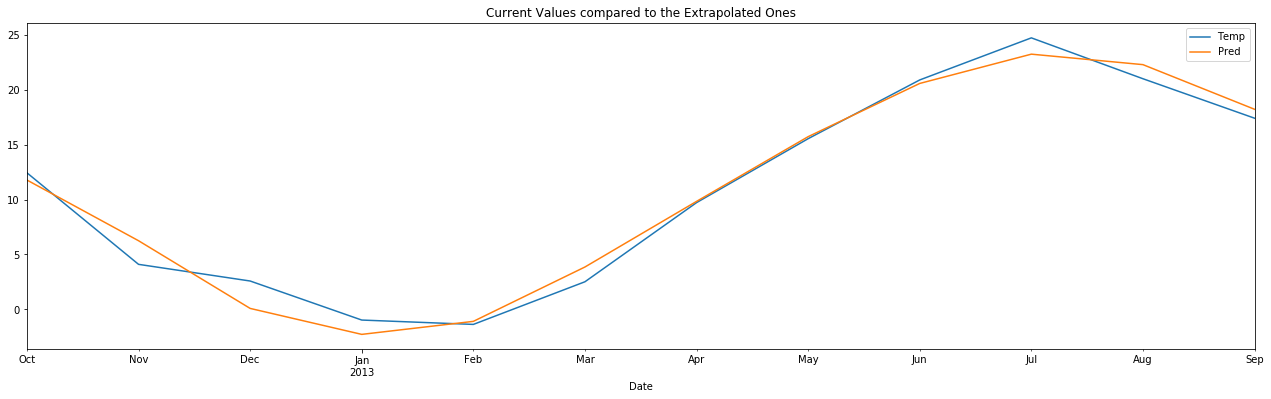

In [141]:
test[['Temp', 'Pred']].plot(figsize=(22,6))
plt.title('Current Values compared to the Extrapolated Ones')
plt.show()

In [142]:
#white noise test on residuals
sm.stats.acorr_ljungbox(val['Error'], lags=[12],boxpierce=True)
#the 2nd list in the returned array is p-values from the ljungbox test and the 4th list is the p-values from the boxpierce test. 
#Since p-value > .05,both tests agree that residuals(each of it's first 12 lags with > 95% confidence level) are white noise .

(array([11.52010506]),
 array([0.48494784]),
 array([10.03827422]),
 array([0.61260276]))

In [128]:
#white noise test on residuals
sm.stats.acorr_ljungbox(valpop['Error'], lags=[12],boxpierce=True)
#the 2nd list in the returned array is p-values from the ljungbox test and the 4th list is the p-values from the boxpierce test. 
#Since p-value < .05,both tests agree that residuals(each of it's first 12 lags with > 95% confidence level) are not quite white noise.
#Hence, model can be improved.

(array([20.45229007]),
 array([0.05899945]),
 array([18.59556556]),
 array([0.09876735]))

In [143]:
#Evaluating the model with the RMSE in the test set (baseline against the extrapolation):
test_baseline = test['Temp'].shift()

test_baseline[0] = test['Temp'][0]

rmse_test_base = measure_rmse(test['Temp'],test_baseline)
rmse_test_extrap = measure_rmse(test['Temp'], test['Pred'])

print(f'The baseline RMSE for the test baseline was {round(rmse_test_base,2)} celsius degrees')
print(f'The baseline RMSE for the test extrapolation was {round(rmse_test_extrap,2)} celsius degrees')
print(f'That is an improvement of {-round((rmse_test_extrap/rmse_test_base-1)*100,2)}%')

The baseline RMSE for the test baseline was 4.61 celsius degrees
The baseline RMSE for the test extrapolation was 1.28 celsius degrees
That is an improvement of 72.36%


In [144]:
#pred_fut = result.predict(start='2013-10-01', end='2025-10-01')
pred_fut1 = result.predict(start='2020-01-01', end='2021-12-01')

In [145]:
pred_fut1

2020-01-01    -2.208926
2020-02-01    -1.017111
2020-03-01     3.937390
2020-04-01     9.913034
2020-05-01    15.806841
2020-06-01    20.653263
2020-07-01    23.319662
2020-08-01    22.365845
2020-09-01    18.302368
2020-10-01    11.787100
2020-11-01     6.295261
2020-12-01     0.154009
2021-01-01    -2.197207
2021-02-01    -1.005392
2021-03-01     3.949108
2021-04-01     9.924753
2021-05-01    15.818560
2021-06-01    20.664981
2021-07-01    23.331381
2021-08-01    22.377564
2021-09-01    18.314087
2021-10-01    11.798819
2021-11-01     6.306980
2021-12-01     0.165728
Freq: MS, dtype: float64

In [123]:
len(np.tile(testpop['Population'], 1))

12

In [125]:
# Forecast
n_periods = 12
fitted_test, confint = sxmodel.predict(n_periods=n_periods, 
                                  exogenous=np.tile(testpop['Population'], 1).reshape(-1,1), 
                                  return_conf_int=True)

In [127]:
testpop['Future']= fitted_test

In [128]:
testpop

,Temp,City,Population,month,year,Future
Date,,,,,,
2012-10-01,12.436,New York,19572932.0,10,2012,11.898062
2012-11-01,4.103,New York,19572932.0,11,2012,6.197740
2012-12-01,2.586,New York,19624447.0,12,2012,0.385614
2013-01-01,-0.968,New York,19624447.0,1,2013,-1.728498
2013-02-01,-1.365,New York,19624447.0,2,2013,-1.068961
2013-03-01,2.518,New York,19624447.0,3,2013,3.503499
2013-04-01,9.723,New York,19624447.0,4,2013,9.884867
2013-05-01,15.544,New York,19624447.0,5,2013,15.158800
2013-06-01,20.892,New York,19624447.0,6,2013,20.774652


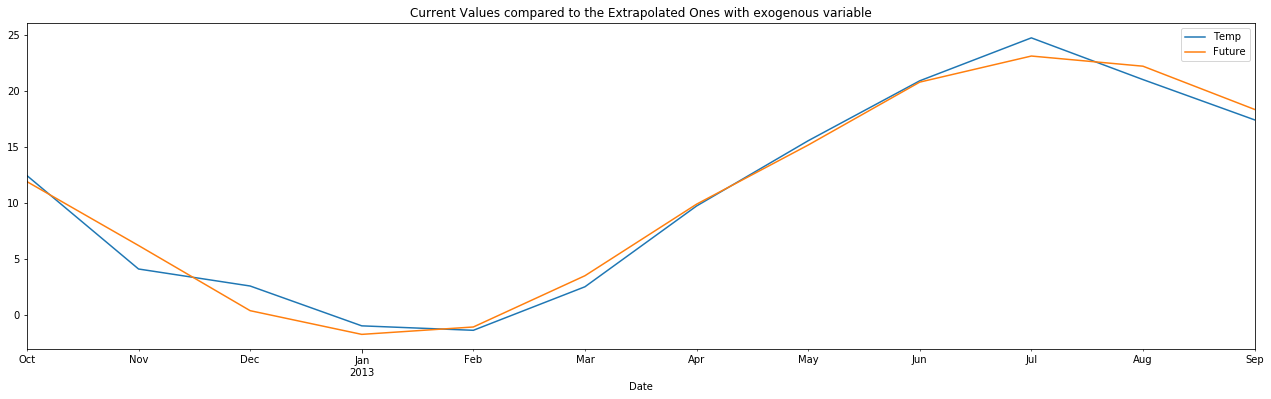

In [129]:
testpop[['Temp', 'Future']].plot(figsize=(22,6))
plt.title('Current Values compared to the Extrapolated Ones with exogenous variable')
plt.show()